<a href="https://colab.research.google.com/github/Akashskygh/LogisticRegression-and-KNN/blob/main/LogisticRegression_%26_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
df = pd.read_csv("ANSUR II Mixed modified.csv")
df.describe()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,...,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,Heightin,Weightlbs
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.00000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,246.552500,1388.43500,322.076500,223.290000,1285.571000,240.565000,190.233500,392.062000,332.870500,273.076000,...,910.347500,227.31700,378.78850,1017.998000,769.626500,166.306000,819.410000,30.813000,67.344500,168.532500
std,36.423819,80.46209,21.263318,16.080335,72.966204,17.021917,13.527804,30.731195,42.005094,20.007433,...,111.339962,34.80036,32.73638,64.425751,153.606808,13.555893,47.895124,8.653292,4.007349,33.297617
min,155.000000,1115.00000,249.000000,170.000000,1038.000000,194.000000,151.000000,311.000000,230.000000,197.000000,...,620.000000,138.00000,295.00000,805.000000,400.000000,134.000000,672.000000,18.000000,56.000000,0.000000
25%,219.000000,1328.75000,307.000000,212.000000,1233.000000,227.000000,180.000000,367.000000,302.000000,259.750000,...,824.000000,201.00000,355.00000,972.000000,659.000000,155.000000,785.000000,24.000000,64.000000,145.000000
50%,243.000000,1386.00000,322.000000,223.000000,1284.000000,240.000000,190.000000,392.000000,330.000000,273.000000,...,908.000000,224.00000,377.00000,1017.000000,754.000000,166.000000,817.000000,29.000000,67.000000,165.000000
75%,271.000000,1443.00000,336.000000,233.250000,1334.000000,253.000000,200.000000,416.000000,362.000000,286.000000,...,989.000000,250.00000,400.00000,1061.000000,867.000000,177.000000,852.000000,38.000000,70.000000,190.000000
max,451.000000,1648.00000,388.000000,281.000000,1535.000000,297.000000,234.000000,475.000000,478.000000,362.000000,...,1379.000000,406.00000,494.00000,1245.000000,1413.000000,207.000000,990.000000,58.000000,94.000000,315.000000


In [ ]:
print("Dimensions:", df.shape)
print("Columns:", df.columns)

Dimensions: (2000, 90)
Columns: Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'calfcircumference', 'cervicaleheight',
       'chestbreadth', 'chestcircumference', 'chestdepth', 'chestheight',
       'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength',
       'forearmcenterofgriplength', 'forearmcircumferenceflexed',
       'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength',
       'handbreadth', 'handcircumference', 'handlength', 'headbreadth',
       'headcircumference', 'headlength', 'heelanklecircumference',
       'heelbreadth', 'hipbreadth', 'hipbreadthsi

In [ ]:
data = df.values
target = df["Gender"].values
print(data)
print(target)

[[266 1467 337 ... 71 180 'Right hand']
 [233 1395 326 ... 68 160 'Left hand']
 [287 1430 341 ... 68 205 'Left hand']
 ...
 [274 1477 370 ... 72 235 'Right hand']
 [270 1483 342 ... 72 195 'Right hand']
 [250 1547 348 ... 74 185 'Right hand']]
['Male' 'Male' 'Male' ... 'Male' 'Male' 'Male']


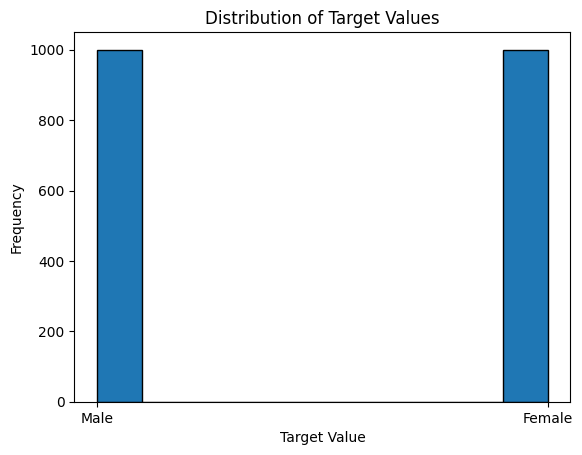

In [ ]:
# Plot a histogram of the target values
plt.hist(target, edgecolor = "black")
plt.xlabel('Target Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Values')
plt.show()

In [ ]:
sns.pairplot(df)

In [ ]:
inputs = ['span', 'thighcircumference']
X = df[inputs].values
y = df["Gender"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

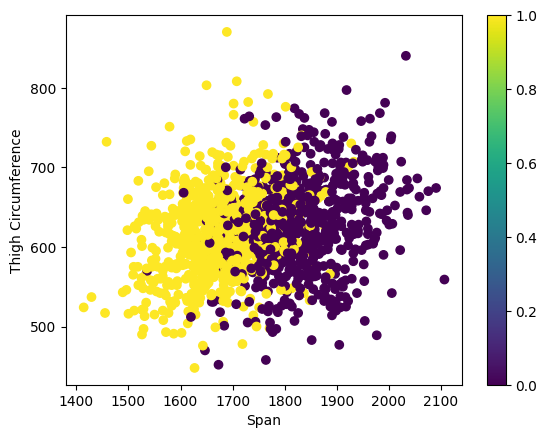

In [ ]:
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train == "Female")
plt.xlabel("Span")
plt.ylabel("Thigh Circumference")
plt.colorbar()
plt.show()

**LogisticRegression**

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, pred))
#print("R-squared Value:", r2_score(y_test, pred))
#print("Mean Squared Error:", mean_squared_error(y_test, pred))

Accuracy Score: 0.825


**A higher accuracy score indicates that the model has made more correct predictions, while a lower accuracy score indicates that the model has made more incorrect predictions.
A higher R-squared value indicates a better fit.
MSE quantifies the average squared difference between predicted and actual values in a regression model, with lower values indicating better model fit.**

In [ ]:
print("B0:", model.intercept_[0])
print("B1:", model.coef_[0,0])
print("B2:", model.coef_[0,1])

B0: -38.929330010231794
B1: 0.02462157063666816
B2: -0.006615546546522557


**B0 represents the y-intercept, B1 is the coefficient for the first independent variable, and B2 is the coefficient for the second independent variable in the linear equation.**

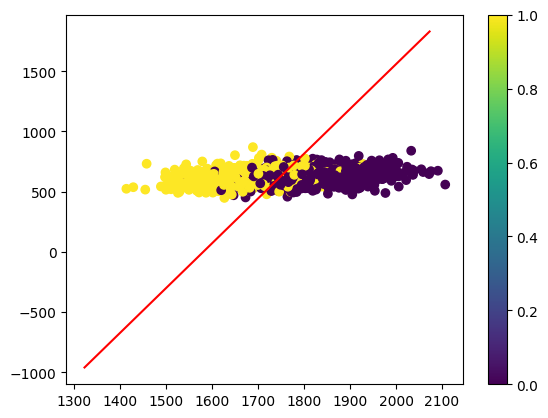

In [ ]:
def dividingLine(x):
  b0 = model.intercept_[0]
  b1 = model.coef_[0,0]
  b2 = model.coef_[0,1]

  b = -b0/b2
  m = -b1/b2

  return m*x + b

endpoints = np.array([X_test[:,0].min(), X_test[:,0].max()])

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train == "Female")
plt.plot(endpoints, dividingLine(endpoints), c = 'red')
plt.colorbar()
plt.show()

In [ ]:
cv = KFold(n_splits=4, shuffle=True)

scores = cross_val_score( model,
                          X,
                          y,
                          cv = cv,
                          scoring = 'accuracy')

print("mean: ", np.mean(scores))
print("SD: ", np.std(scores))

mean:  0.833
SD:  0.006708203932499375


**Mean signifies the average performance metric, and SD (standard deviation) indicates the measure of variability or consistency in that metric across different data subsets. A higher mean accuracy indicates a better-performing model on average.  A lower standard deviation suggests that the model's performance is consistent across folds, while a higher standard deviation may indicate that the model's performance varies widely from fold to fold.**

**KNN**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7725
Confusion Matrix:
 [[151  42]
 [ 49 158]]
Classification Report:
               precision    recall  f1-score   support

      Female       0.76      0.78      0.77       193
        Male       0.79      0.76      0.78       207

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



**Confusion matrix summarizes predicted and actual class results, while the Classification Report provides detailed metrics like precision, recall, and F1-score for each class.**

In [ ]:
# For Binary Class
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)
plt.xlabel("Span")
plt.ylabel("Thigh Circumference")
plt.title("KNN Classification")
plt.colorbar()
plt.show()

In [ ]:
#For Multiclass
# Create a colormap with unique colors for each class
cmap = ListedColormap(np.random.rand(len(np.unique(y_pred)), 3))

# Create a scatter plot with the colormap
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cmap)
plt.xlabel("Span")
plt.ylabel("Thigh Circumference")
plt.title("KNN Classification (Multiclass) with Colormap")
plt.colorbar(label="Class")
plt.show()

In [ ]:

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.title("Actual vs. Predicted Classes")
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.77
Confusion Matrix:
 [[150  43]
 [ 49 158]]
Classification Report:
               precision    recall  f1-score   support

      Female       0.75      0.78      0.77       193
        Male       0.79      0.76      0.77       207

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



**The results are slightly different with Manhattan distance compared to Euclidean distance in KNN. Manhattan distance calculates distance by summing the absolute differences along each dimension, which can lead to different neighbor selections and potentially different classification outcomes, especially when data features have varying importance or scales. On the other hand, Euclidean distance calculates distance by taking the square root of the sum of the squared differences along each dimension. It essentially calculates the straight-line distance between two points in a multi-dimensional space.**